In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
import keras
import glob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Побудуйте нейронну мережу для класифікації зображень та порівняйте її з існуючою (VGG16, ResNet32 або будь-якою іншою на Ваш вибір). При побудові нейронної мережі скористайтесь техніками для боротьби із затуханням градієнту (за потреби), регуляризації та нормування шарів (за потреби). 

In [2]:
dir_name='../input/the-oxfordiiit-pet-dataset/images/*'
#not sure what's going on with directory names in Kaggle, but needed the asterik to get it to work with glob

fnames = os.listdir("/kaggle/input/the-oxfordiiit-pet-dataset/images")
def get_class_of_image(x):
    y = x.split('_')
    return '_'.join(y[0:len(y)-1])

y = list(map(get_class_of_image,fnames))
def add_path(x):
    return '/kaggle/input/the-oxfordiiit-pet-dataset/images/'+x

pathes = list(map(add_path,fnames))

df = pd.DataFrame({'path':pathes,'class':y})

In [3]:
import random
random.seed(42)

datagen = image.ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = datagen.flow_from_dataframe(dataframe=df, 
                                              #directory= '../input/the-oxfordiiit-pet-dataset/images/images',
                                             x_col='path',
                                             y_col='class',
                                             target_size=(128,128),
                                             class_mode='categorical',
                                             batch_size=100,
                                             subset='training'
                                             )

validation_generator = datagen.flow_from_dataframe(dataframe=df,
                                                   x_col='path',                                                   
                                             y_col='class',
                                             target_size=(128,128),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='validation',
                                             seed=7)

Found 5912 validated image filenames belonging to 37 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 1478 validated image filenames belonging to 37 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [5]:
import keras
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
first_model = keras.Sequential()
first_model.add(Conv2D(20, (4, 4), input_shape=(128, 128, 3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
#cnn_model.add(Dense(100,activation = 'relu'))
first_model.add(Dense(37,activation = 'softmax'))

first_model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [6]:
first_history = first_model.fit(train_generator,epochs = 7)

Epoch 1/7
60/60 [==============================] - 63s 898ms/step - loss: 3.7152 - accuracy: 0.0672
Epoch 2/7
60/60 [==============================] - 19s 321ms/step - loss: 2.7409 - accuracy: 0.2769
Epoch 3/7
60/60 [==============================] - 20s 329ms/step - loss: 1.9286 - accuracy: 0.5250
Epoch 4/7
60/60 [==============================] - 20s 326ms/step - loss: 1.2371 - accuracy: 0.7216
Epoch 5/7
60/60 [==============================] - 19s 322ms/step - loss: 0.6988 - accuracy: 0.8703
Epoch 6/7
60/60 [==============================] - 19s 323ms/step - loss: 0.3537 - accuracy: 0.9472
Epoch 7/7
60/60 [==============================] - 20s 325ms/step - loss: 0.1944 - accuracy: 0.9748


In [8]:
first_model.evaluate(validation_generator)

148/148 [==============================] - 5s 34ms/step - loss: 3.7175 - accuracy: 0.1759


[3.717482805252075, 0.17591339349746704]

Перед собою ми бачимо тотальне фіаско. Давайте спробуємо додати додаткові шари. Оскільки модель перетреновується давайте додамо шар дропаута.

In [18]:
second_model = keras.Sequential()
second_model.add(Conv2D(30, (4, 4), input_shape=(128, 128, 3), activation='relu'))
second_model.add(Dropout(0.2))
second_model.add(MaxPooling2D(pool_size=(2, 2)))
second_model.add(Flatten())
second_model.add(Dense(100,activation = 'relu'))
second_model.add(Dense(37,activation = 'softmax'))

second_model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
second_history = second_model.fit(train_generator,epochs = 7)

Epoch 1/7
60/60 [==============================] - 19s 323ms/step - loss: 1.1413 - accuracy: 0.7140
Epoch 2/7
60/60 [==============================] - 19s 321ms/step - loss: 0.8307 - accuracy: 0.8097
Epoch 3/7
60/60 [==============================] - 20s 332ms/step - loss: 0.5380 - accuracy: 0.8892
Epoch 4/7
60/60 [==============================] - 20s 326ms/step - loss: 0.3798 - accuracy: 0.9271
Epoch 5/7
60/60 [==============================] - 19s 322ms/step - loss: 0.2333 - accuracy: 0.9579
Epoch 6/7
60/60 [==============================] - 20s 330ms/step - loss: 0.1489 - accuracy: 0.9782
Epoch 7/7
60/60 [==============================] - 20s 328ms/step - loss: 0.1203 - accuracy: 0.9773


In [26]:
second_model.evaluate(validation_generator)

148/148 [==============================] - 5s 32ms/step - loss: 4.6219 - accuracy: 0.1360


[4.6218976974487305, 0.1359945833683014]

In [10]:
pip install helpers

Note: you may need to restart the kernel to use updated packages.


In [11]:
# RESNET 32 
from helpers import *
from keras.layers import *
from keras.models import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
def building_block(X, filter_size, filters, stride=1):

    # Save the input value for shortcut
    X_shortcut = X

    # Reshape shortcut for later adding if dimensions change
    if stride > 1:

        X_shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(X_shortcut)
        X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    # First layer of the block
    X = Conv2D(filters, kernel_size = filter_size, strides=stride, padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Second layer of the block
    X = Conv2D(filters, kernel_size = filter_size, strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = add([X, X_shortcut])  # Add shortcut value to main path
    X = Activation('relu')(X)

    return X

def create_model(input_shape, classes, name):

    # Define the input
    X_input = Input(input_shape)

    # Stage 1
    X = Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same')(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Stage 2
    X = building_block(X, filter_size=3, filters=16, stride=1)
    X = building_block(X, filter_size=3, filters=16, stride=1)
    X = building_block(X, filter_size=3, filters=16, stride=1)
    X = building_block(X, filter_size=3, filters=16, stride=1)
    X = building_block(X, filter_size=3, filters=16, stride=1)

    # Stage 3
    X = building_block(X, filter_size=3, filters=32, stride=2)  # dimensions change (stride=2)
    X = building_block(X, filter_size=3, filters=32, stride=1)
    X = building_block(X, filter_size=3, filters=32, stride=1)
    X = building_block(X, filter_size=3, filters=32, stride=1)
    X = building_block(X, filter_size=3, filters=32, stride=1)

    # Stage 4
    X = building_block(X, filter_size=3, filters=64, stride=2)  # dimensions change (stride=2)
    X = building_block(X, filter_size=3, filters=64, stride=1)
    X = building_block(X, filter_size=3, filters=64, stride=1)
    X = building_block(X, filter_size=3, filters=64, stride=1)
    X = building_block(X, filter_size=3, filters=64, stride=1)

    # Average pooling and output layer
    X = GlobalAveragePooling2D()(X)
    X = Dense(classes, activation='softmax')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name=name)

    return model


ResNet32 = create_model(input_shape=(128,128,3), classes=37 , name='ResNet32')
ResNet32.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [14]:
renet_info = ResNet32.fit(train_generator,epochs =20)

Epoch 1/20
60/60 [==============================] - 34s 552ms/step - loss: 2.7851 - accuracy: 0.2109
Epoch 2/20
60/60 [==============================] - 33s 551ms/step - loss: 2.6661 - accuracy: 0.2441
Epoch 3/20
60/60 [==============================] - 33s 542ms/step - loss: 2.5846 - accuracy: 0.2610
Epoch 4/20
60/60 [==============================] - 33s 549ms/step - loss: 2.4733 - accuracy: 0.2835
Epoch 5/20
60/60 [==============================] - 33s 546ms/step - loss: 2.3583 - accuracy: 0.3163
Epoch 6/20
60/60 [==============================] - 33s 545ms/step - loss: 2.2952 - accuracy: 0.3288
Epoch 7/20
60/60 [==============================] - 33s 548ms/step - loss: 2.2021 - accuracy: 0.3566
Epoch 8/20
60/60 [==============================] - 33s 549ms/step - loss: 2.1019 - accuracy: 0.3794
Epoch 9/20
60/60 [==============================] - 33s 548ms/step - loss: 2.0249 - accuracy: 0.4005
Epoch 10/20
60/60 [==============================] - 33s 548ms/step - loss: 1.8947 - accura

In [15]:
ResNet32.evaluate(validation_generator)

148/148 [==============================] - 7s 40ms/step - loss: 4.5363 - accuracy: 0.1258


[4.536262512207031, 0.12584573030471802]

Які висновки можна зробити з даної лабораторної? 
1. Для того, щоб нормально натренувати цю модель треба значно більше часу, зокрема на нормальний EDA, а також на більший час тренування за домогою ResNet архітектури
2. На мою думку для того, щоб нормальним чином спрогнозувати клас варто було б спробувати декілька рішень на яких у мене не вистачає часу, зокрема
       - використати більшу розмірність для сжатих фото
       - спробувати не тренувати це в кольоровій гамі а зробити чорнобіле тренування
       - додати більшу conv шарів чергуючи їх з dropout шарами
       - довше потренувати resnet модель.
       
В цілому після цієї лаби у мене є лише ось це  
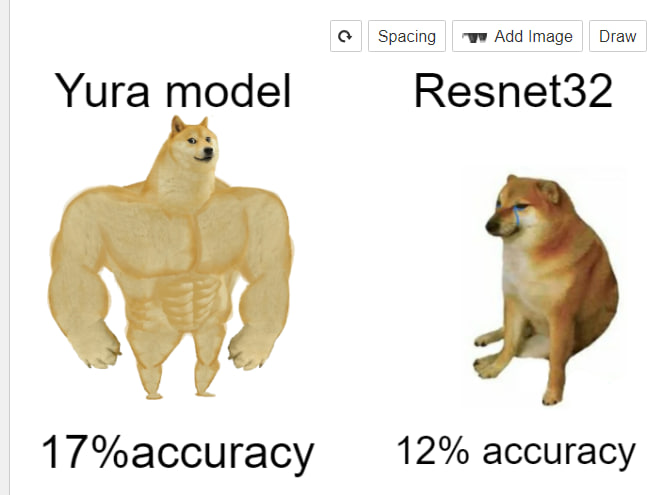